# Normalization and Standardization Techniques

This notebook demonstrates how to normalize and standardize data using Min-Max scaling and Z-score scaling techniques. We'll work with synthetic healthcare data to show the effects of different scaling methods.

**Learning Objectives:**
- Understand the difference between normalization and standardization
- Learn Min-Max scaling (normalization) technique
- Master Z-score scaling (standardization) technique
- Visualize the effects of different scaling methods

**Prerequisites:**
- Basic Python programming
- Familiarity with pandas and NumPy
- Understanding of statistical concepts (mean, standard deviation)
- Basic knowledge of scikit-learn preprocessing

In [1]:
# Import the required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

## Step 1: Generate Sample Healthcare Data

We'll create synthetic healthcare data with different scales to demonstrate the need for normalization and standardization.

In [2]:
# Sample synthetic healthcare data
np.random.seed(42)

data = {
    # Patient IDs
    "Patient_ID": np.arange(1, 11),
    # Random blood pressure values
    "Blood_Pressure": np.random.randint(110, 180, 10),
    # Random heart rate values
    "Heart_Rate": np.random.randint(60, 100, 10)
}

df = pd.DataFrame(data)
print("Original Data:")
print(df)
print(f"\nData Statistics:")
print(df.describe())

Original Data:
   Patient_ID  Blood_Pressure  Heart_Rate
0           1             161          97
1           2             124          61
2           3             170          80
3           4             130          92
4           5             133          71
5           6             112          81
6           7             131          84
7           8             162          86
8           9             111          87
9          10             139          75

Data Statistics:
       Patient_ID  Blood_Pressure  Heart_Rate
count    10.00000       10.000000   10.000000
mean      5.50000      137.300000   81.400000
std       3.02765       20.720628   10.447754
min       1.00000      111.000000   61.000000
25%       3.25000      125.500000   76.250000
50%       5.50000      132.000000   82.500000
75%       7.75000      155.500000   86.750000
max      10.00000      170.000000   97.000000


## Step 2: Normalization using Min-Max Scaling

Min-Max scaling transforms data to a fixed range, typically [0, 1]. The formula is: (x - min) / (max - min)

In [3]:
# Normalization (Min-Max Scaling)
scaler_normalization = MinMaxScaler()
df_normalized = df.copy()
df_normalized[["Blood_Pressure", "Heart_Rate"]] = \
    scaler_normalization.fit_transform(df[["Blood_Pressure", "Heart_Rate"]])

print("Data after Normalization (range between 0 and 1):")
print(df_normalized)
print(f"\nNormalized Data Statistics:")
print(df_normalized.describe())

Data after Normalization (range between 0 and 1):
   Patient_ID  Blood_Pressure  Heart_Rate
0           1        0.847458    1.000000
1           2        0.220339    0.000000
2           3        1.000000    0.527778
3           4        0.322034    0.861111
4           5        0.372881    0.277778
5           6        0.016949    0.555556
6           7        0.338983    0.638889
7           8        0.864407    0.694444
8           9        0.000000    0.722222
9          10        0.474576    0.388889

Normalized Data Statistics:
       Patient_ID  Blood_Pressure  Heart_Rate
count    10.00000       10.000000   10.000000
mean      5.50000        0.445763    0.566667
std       3.02765        0.351197    0.290215
min       1.00000        0.000000    0.000000
25%       3.25000        0.245763    0.423611
50%       5.50000        0.355932    0.597222
75%       7.75000        0.754237    0.715278
max      10.00000        1.000000    1.000000


## Step 3: Standardization using Z-Score Scaling

Z-score scaling transforms data to have mean = 0 and standard deviation = 1. The formula is: (x - mean) / std

In [4]:
# Standardization (Z-score Scaling)
scaler_standardization = StandardScaler()
df_standardized = df.copy()
df_standardized[["Blood_Pressure", "Heart_Rate"]] = \
    scaler_standardization.fit_transform(df[["Blood_Pressure", "Heart_Rate"]])

print("Data after Standardization (mean = 0, std = 1):")
print(df_standardized)
print(f"\nStandardized Data Statistics:")
print(df_standardized.describe())

Data after Standardization (mean = 0, std = 1):
   Patient_ID  Blood_Pressure  Heart_Rate
0           1        1.205658    1.573912
1           2       -0.676593   -2.058192
2           3        1.663503   -0.141249
3           4       -0.371363    1.069453
4           5       -0.218748   -1.049275
5           6       -1.287053   -0.040357
6           7       -0.320491    0.262319
7           8        1.256530    0.464102
8           9       -1.337924    0.564994
9          10        0.086482   -0.645707

Standardized Data Statistics:
       Patient_ID  Blood_Pressure    Heart_Rate
count    10.00000    1.000000e+01  1.000000e+01
mean      5.50000   -5.842549e-16 -5.995204e-16
std       3.02765    1.054093e+00  1.054093e+00
min       1.00000   -1.337924e+00 -2.058192e+00
25%       3.25000   -6.002855e-01 -5.195927e-01
50%       5.50000   -2.696197e-01  1.109810e-01
75%       7.75000    9.258640e-01  5.397711e-01
max      10.00000    1.663503e+00  1.573912e+00


## Step 4: Visualize Original vs Normalized Data

Let's compare the original data with the normalized data using scatter plots.

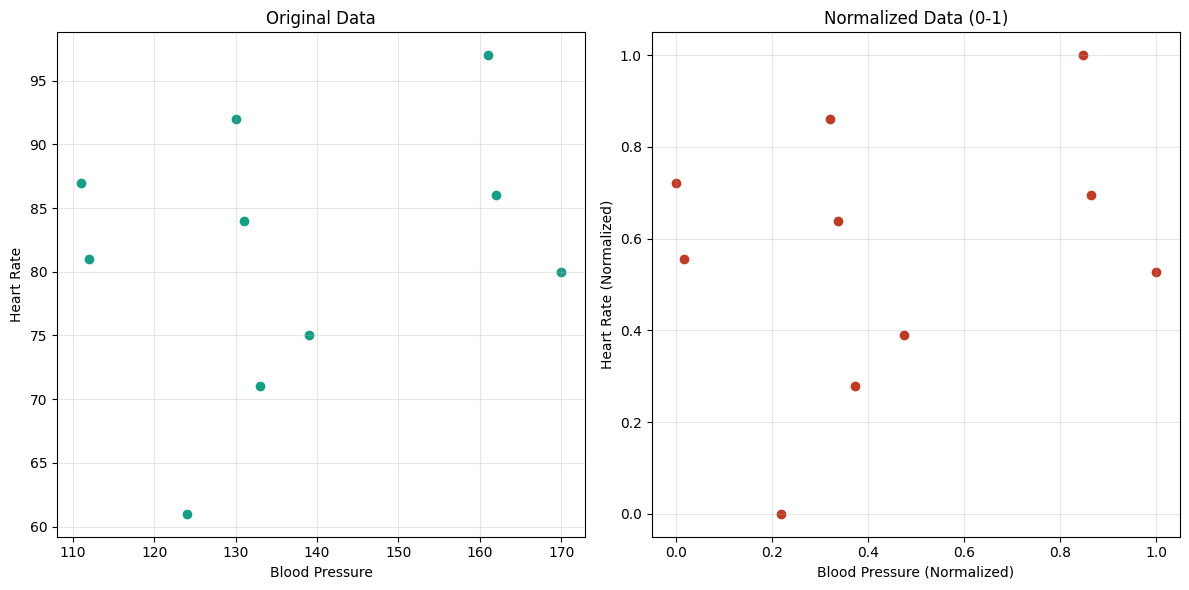

In [5]:
# Plot Original vs Normalized Data
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Original Data Plot
axes[0].scatter(df["Blood_Pressure"], df["Heart_Rate"], color="#179E86")
axes[0].set_title("Original Data")
axes[0].set_xlabel("Blood Pressure")
axes[0].set_ylabel("Heart Rate")
axes[0].grid(True, alpha=0.3)

# Normalized Data Plot
axes[1].scatter(df_normalized["Blood_Pressure"], df_normalized["Heart_Rate"],
                color="#C03B26")
axes[1].set_title("Normalized Data (0-1)")
axes[1].set_xlabel("Blood Pressure (Normalized)")
axes[1].set_ylabel("Heart Rate (Normalized)")
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Step 5: Visualize Original vs Standardized Data

Now let's compare the original data with the standardized data.

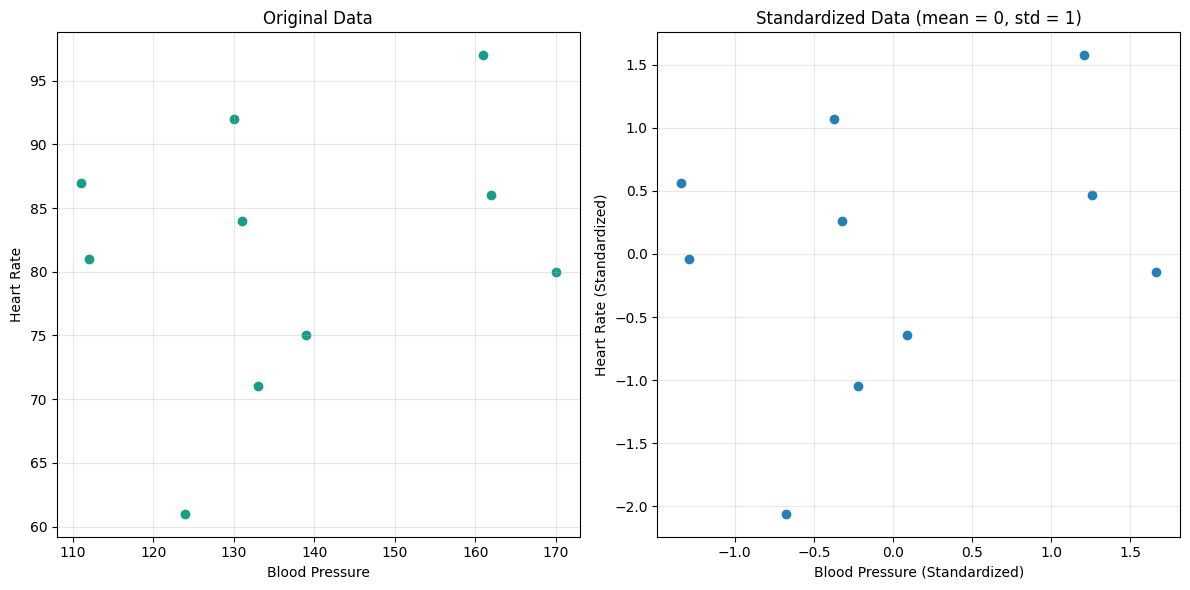

In [6]:
# Plot Original vs Standardized Data
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Original Data Plot
axes[0].scatter(df["Blood_Pressure"], df["Heart_Rate"], color="#179E86")
axes[0].set_title("Original Data")
axes[0].set_xlabel("Blood Pressure")
axes[0].set_ylabel("Heart Rate")
axes[0].grid(True, alpha=0.3)

# Standardized Data Plot
axes[1].scatter(df_standardized["Blood_Pressure"], df_standardized["Heart_Rate"],
                color="#2580B7")
axes[1].set_title("Standardized Data (mean = 0, std = 1)")
axes[1].set_xlabel("Blood Pressure (Standardized)")
axes[1].set_ylabel("Heart Rate (Standardized)")
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Step 6: Compare All Three Scaling Methods

Let's create a comprehensive comparison of all three scaling methods.

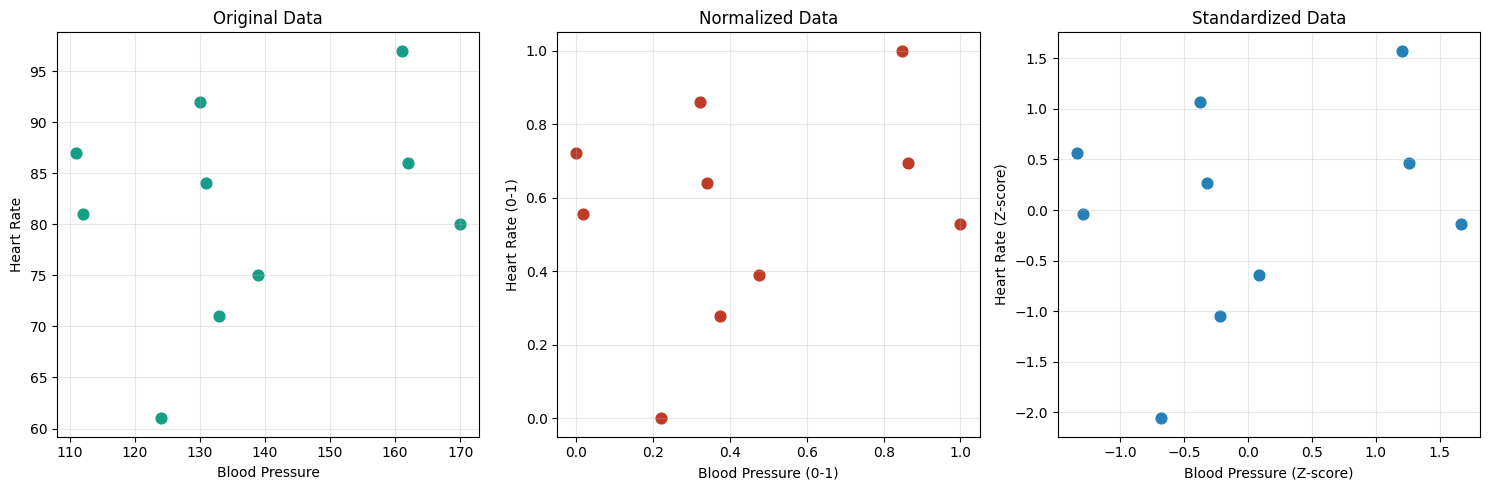

In [7]:
# Compare all three scaling methods
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original Data
axes[0].scatter(df["Blood_Pressure"], df["Heart_Rate"], color="#179E86", s=60)
axes[0].set_title("Original Data")
axes[0].set_xlabel("Blood Pressure")
axes[0].set_ylabel("Heart Rate")
axes[0].grid(True, alpha=0.3)

# Normalized Data
axes[1].scatter(df_normalized["Blood_Pressure"], df_normalized["Heart_Rate"], 
                color="#C03B26", s=60)
axes[1].set_title("Normalized Data")
axes[1].set_xlabel("Blood Pressure (0-1)")
axes[1].set_ylabel("Heart Rate (0-1)")
axes[1].grid(True, alpha=0.3)

# Standardized Data
axes[2].scatter(df_standardized["Blood_Pressure"], df_standardized["Heart_Rate"], 
                color="#2580B7", s=60)
axes[2].set_title("Standardized Data")
axes[2].set_xlabel("Blood Pressure (Z-score)")
axes[2].set_ylabel("Heart Rate (Z-score)")
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Step 7: Statistical Comparison

Let's examine the statistical properties of each scaling method.

In [8]:
# Statistical comparison
print("Statistical Comparison of Scaling Methods:")
print("="*60)

# Create comparison DataFrame
comparison_stats = pd.DataFrame({
    'Original_BP': [df['Blood_Pressure'].min(), df['Blood_Pressure'].max(), 
                    df['Blood_Pressure'].mean(), df['Blood_Pressure'].std()],
    'Original_HR': [df['Heart_Rate'].min(), df['Heart_Rate'].max(), 
                    df['Heart_Rate'].mean(), df['Heart_Rate'].std()],
    'Normalized_BP': [df_normalized['Blood_Pressure'].min(), df_normalized['Blood_Pressure'].max(), 
                      df_normalized['Blood_Pressure'].mean(), df_normalized['Blood_Pressure'].std()],
    'Normalized_HR': [df_normalized['Heart_Rate'].min(), df_normalized['Heart_Rate'].max(), 
                      df_normalized['Heart_Rate'].mean(), df_normalized['Heart_Rate'].std()],
    'Standardized_BP': [df_standardized['Blood_Pressure'].min(), df_standardized['Blood_Pressure'].max(), 
                        df_standardized['Blood_Pressure'].mean(), df_standardized['Blood_Pressure'].std()],
    'Standardized_HR': [df_standardized['Heart_Rate'].min(), df_standardized['Heart_Rate'].max(), 
                        df_standardized['Heart_Rate'].mean(), df_standardized['Heart_Rate'].std()]
}, index=['Min', 'Max', 'Mean', 'Std'])

print(comparison_stats.round(4))

Statistical Comparison of Scaling Methods:
      Original_BP  Original_HR  Normalized_BP  Normalized_HR  Standardized_BP  \
Min      111.0000      61.0000         0.0000         0.0000          -1.3379   
Max      170.0000      97.0000         1.0000         1.0000           1.6635   
Mean     137.3000      81.4000         0.4458         0.5667          -0.0000   
Std       20.7206      10.4478         0.3512         0.2902           1.0541   

      Standardized_HR  
Min           -2.0582  
Max            1.5739  
Mean          -0.0000  
Std            1.0541  


## Summary

In this notebook, we explored two fundamental data scaling techniques:

### Normalization (Min-Max Scaling):
- **Purpose**: Scales data to a fixed range, typically [0, 1]
- **Formula**: (x - min) / (max - min)
- **When to use**: 
  - When you know the bounds of your data
  - For algorithms that require bounded input (e.g., neural networks)
  - When you want to preserve the original distribution shape
- **Pros**: Preserves relationships, bounded output, interpretable scale
- **Cons**: Sensitive to outliers, may not work well with unknown future data

### Standardization (Z-Score Scaling):
- **Purpose**: Centers data around mean=0 with standard deviation=1
- **Formula**: (x - mean) / std
- **When to use**:
  - For algorithms that assume normally distributed data
  - When features have different units and scales
  - For algorithms like SVM, logistic regression, neural networks
- **Pros**: Not bounded by range, less sensitive to outliers, works with unbounded data
- **Cons**: Doesn't preserve the exact shape of original distribution

### Key Takeaways:
1. **Normalization** is ideal when you want bounded values and know the data range
2. **Standardization** is better for normally distributed data and algorithms that assume this
3. Both techniques preserve the relative distances between data points
4. The choice depends on your specific algorithm and data characteristics
5. Always fit the scaler on training data and transform both training and test data using the same scaler

Remember: The goal is to ensure that all features contribute equally to the model's learning process!